#  Analytical representation of 30 mins intraday stock data from 1998 to 2015

_For this project on analyzing 30 mins intraday stock data, I will present descriptive statistics for a bunch of dataset (and my "ultimate" plan is to make a model which will be trained by these datasets and will be tested by other available datasets.)_ 

## 1. Importing library packages

For analyzing the dataset, I'll be importing couple of python libraries namely **numpy**, which is essential to manipulate large, multidimensional matrices and arrays, **matplotlib**, which will be useful to plot all the prices and other features' value and then **pandas** which is an acclaimed python library for data analysis.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress
from pandas.plotting import lag_plot

## 2. Conversion of .txt file into .csv file and read that in dataframe

To facilitate the analysis I'm converting **.txt** file into **.csv** file at this point. 

In [34]:
df=pd.read_csv("AA.csv");  #Loading the .csv file on dataframe df

#df=pd.read_csv("AA.csv", names=['Date', 'Time', 'Closing Price', 'Highest price','Lowest price','Opening price','Volume'])#another way to name the features


## 3. Working in dataframe

In [35]:

df.columns = ['Date', 'Time', 'Closing Price', 'Highest Price','Lowest Price','Opening Price','Volume'];# Adding columns' title 

df.head(10) # showing top 10 rows on each execution

,Date,Time,Closing Price,Highest Price,Lowest Price,Opening Price,Volume
0,01/02/1998,10:00,13.072,13.130,13.061,13.130,420554
1,01/02/1998,10:30,13.118,13.130,13.107,13.118,272411
2,01/02/1998,11:00,13.118,13.153,13.107,13.153,315824
3,01/02/1998,11:30,13.153,13.199,13.118,13.118,149775
4,01/02/1998,12:00,13.118,13.165,13.118,13.165,115044
5,01/02/1998,12:30,13.153,13.165,13.130,13.153,160083
6,01/02/1998,13:00,13.165,13.165,13.142,13.153,56438
7,01/02/1998,13:30,13.153,13.153,13.095,13.130,97679
8,01/02/1998,14:00,13.130,13.165,13.107,13.142,109075
9,01/02/1998,14:30,13.142,13.142,13.084,13.084,126983


In [36]:
df.shape # it would give number of rows and columns

(84347, 7)

In [37]:
df.iloc[5,:] #iloc” in pandas is used to select rows and columns by number

Date             01/02/1998
Time                  12:30
Closing Price        13.153
Highest Price        13.165
Lowest Price          13.13
Opening Price        13.153
Volume               160083
Name: 5, dtype: object

## 3. Statistical description of data

In [38]:
df.describe() #calling Pandas describe () method which is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

,Closing Price,Highest Price,Lowest Price,Opening Price,Volume
count,84347.000000,84347.000000,84347.000000,84347.000000,8.434700e+04
mean,18.460757,18.522249,18.397176,18.459780,7.343793e+05
std,8.349751,8.378110,8.320101,8.348991,1.200385e+06
min,4.702900,4.731000,4.665300,4.702500,1.000000e+02
25%,10.900000,10.940000,10.856000,10.900000,3.352100e+04
50%,16.030000,16.081000,15.987000,16.030000,3.340590e+05
75%,25.800000,25.880000,25.700000,25.800000,8.871270e+05
max,42.790000,43.160000,42.610000,42.740000,5.319936e+07


## 4. Visualization of data with respect of time

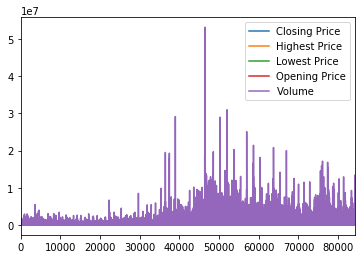

In [39]:
data1 = df.loc[:,['Time', 'Closing Price', 'Highest Price','Lowest Price','Opening Price','Volume']]
data1.plot() #.loc to access the rows and columns by labelling them and plot them consequently 

In [40]:
df['datetime']= pd.to_datetime (df['Date'])
df=df.set_index('datetime')
df.head(10)

,Date,Time,Closing Price,Highest Price,Lowest Price,Opening Price,Volume
datetime,,,,,,,
1998-01-02,01/02/1998,10:00,13.072,13.130,13.061,13.130,420554
1998-01-02,01/02/1998,10:30,13.118,13.130,13.107,13.118,272411
1998-01-02,01/02/1998,11:00,13.118,13.153,13.107,13.153,315824
1998-01-02,01/02/1998,11:30,13.153,13.199,13.118,13.118,149775
1998-01-02,01/02/1998,12:00,13.118,13.165,13.118,13.165,115044
1998-01-02,01/02/1998,12:30,13.153,13.165,13.130,13.153,160083
1998-01-02,01/02/1998,13:00,13.165,13.165,13.142,13.153,56438
1998-01-02,01/02/1998,13:30,13.153,13.153,13.095,13.130,97679
1998-01-02,01/02/1998,14:00,13.130,13.165,13.107,13.142,109075


## 5. Resampling time series data

In order to have a more explicit visualisation of our data sets, we're going to resample the column of dataframe by df.resample ('12M'). '12M' signifies that we want to resample by taking the data for each 12 months from 1998 to 2015.

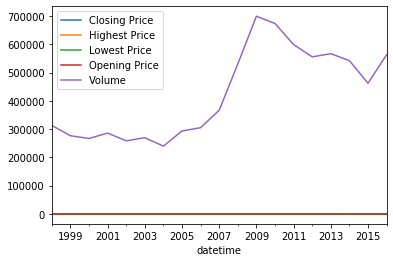

datetime
1998-01-02    10:00
1998-01-02    10:30
1998-01-02    11:00
1998-01-02    11:30
1998-01-02    12:00
1998-01-02    12:30
1998-01-02    13:00
1998-01-02    13:30
1998-01-02    14:00
1998-01-02    14:30
1998-01-02    15:00
1998-01-02    15:30
1998-01-02    16:00
Name: Time, dtype: object

In [41]:
df.resample('12M').median().plot()
plt.show()
df.loc['1998-01-02', 'Time'] #indexing a column 

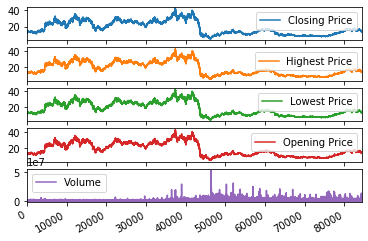

In [42]:
data1.plot(subplots = True) #each series in a dataframe can be plotted on a different axis with the "subplots"
plt.show()

## 5. Finding Autocorrelation 

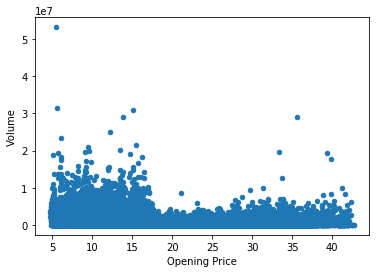

In [43]:
data1.plot(kind = "scatter",x="Opening Price",y = "Volume")
plt.show()  #visual correlation plot between 2 variables/features (opening price & volume here,we can do the same for other variables) by using scatter plot matrix 

In [44]:
df [['Closing Price']].idxmax()

Closing Price   2007-07-16
dtype: datetime64[ns]

In [45]:
df.iloc[37397,1]

'08:30'

In [46]:
df.iloc [37397,0] #to determine from when the abrupt drop started

'07/16/2007'

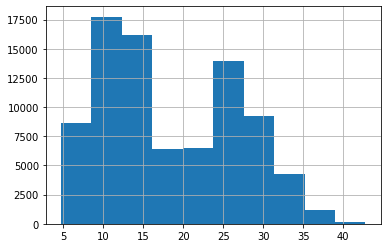

In [47]:
df['Closing Price'].hist ()

## 5. Finding Autocorrelation 

At this point we are going to check if the time series is random or not. For this purpose we'll be using lag_plot which will exhibit an identifiable structure if there is any correlation or not. 

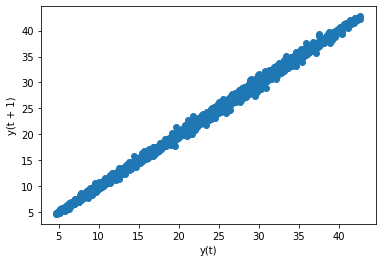

In [48]:
#pd.tools.plotting.lag_plot(df['Closing Price','Highest price','Lowest price','Opening price','Volume'])
#pd.tools.plotting.lag_plot(df['Closing Price'])
lag_plot(df['Opening Price']) #To write the value in logograph we can use np.log (df['Opening Price'])
plt.show()

This lag plot shows a linear pattern. This indicates that the data are clearly non-random and a further suggestion might be projected for an autoregressive model.

In [49]:
#Pearson correlation coefficient
shift_1 = df['Closing Price'].autocorr(lag=1)
print(shift_1)

0.9998910759250732


In [50]:
shift_1 = df['Highest Price'].autocorr(lag=1)
print(shift_1)

0.9998953468500639


We'll be observing if the number of lags can have an impact on the autocorrelation. Here we'll be taking a time series of 60 lags for example.  

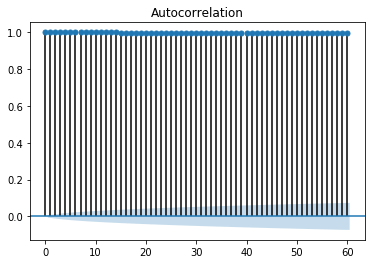

In [51]:
plot_acf(df['Closing Price'], lags=60)
plt.show()

Once again this visualisation validates our previous assumption that the data aren't random and related someway. 

## 6. Stationarity test 

There are plenty of tests to verify the datas' stationarity. Here I'll be using Dickey-Fuller test to understand the data and its stationarity. This is a test that tests the null hypothesis that a unit root is present in time series data. We'll import the adfuller library from the statsmodels library. 

We'll get an ADF value and a p-value. The ADF number should be a negative number and the p-value should be beneath a certain threshold value (ex. 1% or 5%, etc) for a confidence level. For this example, we’ll use 5% (or 95% confidence level), so if the p-value is greater than 0.05 then we say we fail to reject the null hypothesis because the data has a unit root and is non-stationary.  If the p-value is less than or equal to 0.05, we can say we reject the null hypothesis because the data does not have a unit root and is stationary.

In [56]:
from statsmodels.tsa.stattools import adfuller
 
adf_test = adfuller(df['Closing Price'])
print (adf_test[0]) 
print (adf_test[1]) 

-1.9926535368302003
0.28980352831138323


The ADF value is the 1st value in the result and the p-value is the 2nd one. Our P-value is less than .5. So, we can reject the null (unit root, non-stationary data) and can assume our data is stationary. 

# Summary

In [ ]:
pwd